In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
def calc_k_d(data, N=14, M=3):
    data['low_N'] = data['Low'].rolling(N).min()
    data['high_N'] = data['High'].rolling(N).max()
    data['K'] = 100 * (data['Close'] - data['low_N']) / \
        (data['high_N'] - data['low_N'])
    data['D'] = data['K'].rolling(M).mean()
    return data

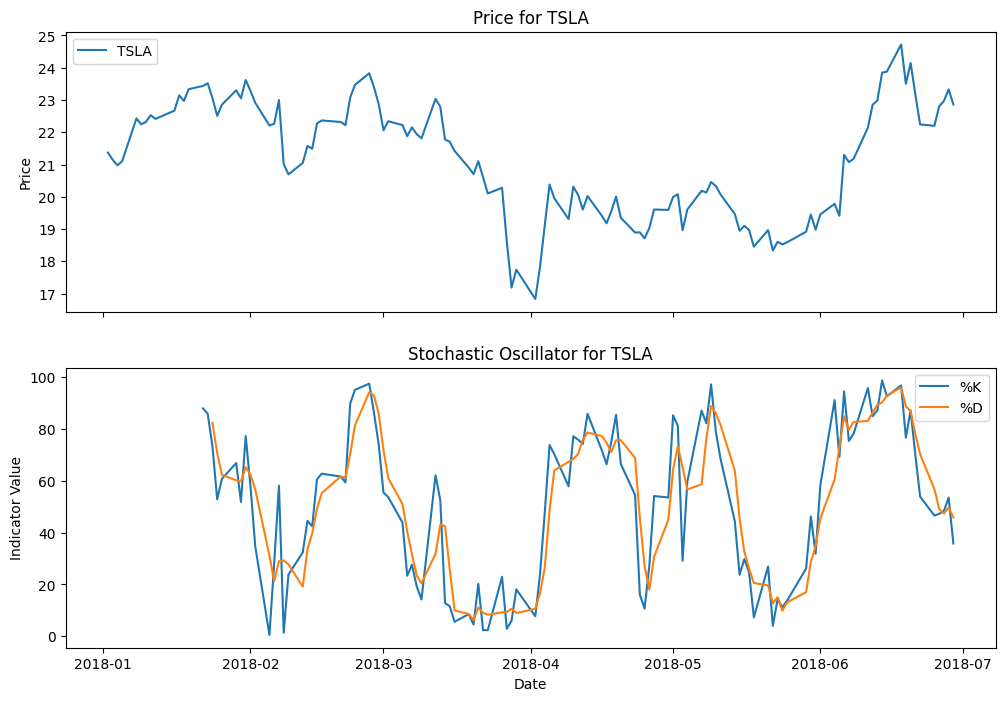

In [5]:
def stochastic_oscillator(ticker, start, end):
    yfObj = yf.Ticker(ticker)
    data = yfObj.history(start=start, end=end)
    data = calc_k_d(data, N, M)
    return data

data = stochastic_oscillator('TSLA', '2018-01-01', '2018-06-30')

# Plot results
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
ax[0].plot(data['Close'], label=f'{ticker}')
ax[0].set_title(f'Price for {ticker}')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(data['K'], label='%K')
ax[1].plot(data['D'], label='%D')
ax[1].set_title(f'Stochastic Oscillator for {ticker}')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Indicator Value')
ax[1].legend()
plt.show()

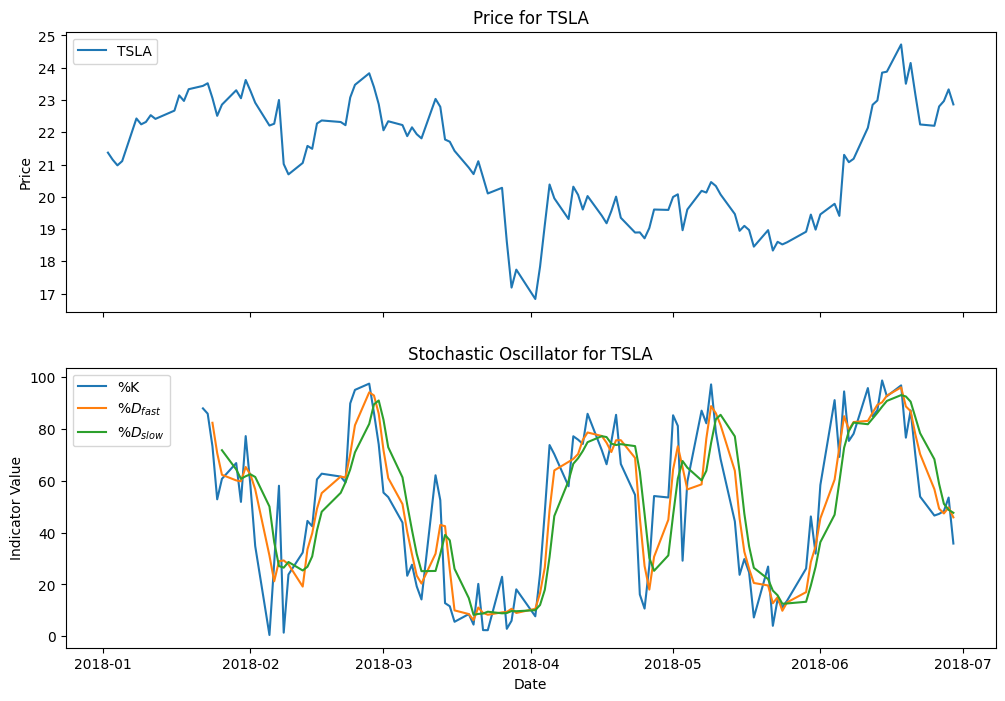

In [6]:
data['D_slow'] = data['D'].rolling(M).mean()

fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

ax[0].plot(data['Close'], label=f'{ticker}')
ax[0].set_title(f'Price for {ticker}')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(data['K'], label='%K')
ax[1].plot(data['D'], label='%$D_{fast}$')
ax[1].plot(data['D_slow'], label='%$D_{slow}$')
ax[1].set_title(f'Stochastic Oscillator for {ticker}')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Indicator Value')
ax[1].legend()

plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(data, data, test_size=0.3, random_state=0)

model = keras.Sqeuential([
    kera.layers.Dense(100, input_shape=(23,), activation='sigmoid'),
    kera.layers.Dense(100, activation='sigmoid'),
    kera.layers.Dense(100, activation='sigmoid'),
    kera.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

predictions=model.predict(x_test)
predictions

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
y_pred = predictions[:1]
roc_auc_score(y_test, y_pred)